Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Wrangle ML datasets 
- Explore tabular data for supervised machine learning
- Join relational data for supervised machine learning

# Explore tabular data for superviesd machine learning 🍌

Wrangling your dataset is often the most challenging and time-consuming part of the modeling process.

In today's lesson, we’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

Let’s get set up:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder, OneHotEncoder

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Download data
import requests

def download(url):
    filename = url.split('/')[-1]
    print(f'Downloading {url}')
    r = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(r.content)
    print(f'Downloaded {filename}')

download('https://lambdaschool-ds.s3.us-east-2.amazonaws.com/datasets%3Ainstacart.tar.gz')

Downloaded datasets%3Ainstacart.tar.gz


In [3]:
# Uncompress data
import tarfile
tarfile.open('datasets%3Ainstacart.tar.gz').extractall()

In [4]:
# Change directory to where the data was uncompressed
%cd instacart_2017_05_01

/Users/sisichen/Desktop/DS-unit2-sprint3/module2-wrangle-ml-datasets/instacart_2017_05_01


In [5]:
# Print the csv filenames
from glob import glob
for filename in glob('*.csv'):
    print(filename)

products.csv
orders.csv
order_products__train.csv
departments.csv
aisles.csv
order_products__prior.csv


**Before you start,** load each of the above `.csv` files into its own DataFrame.

# I. Wrangle the datasets

In [6]:
# Print the csv filenames
from glob import glob
for filename in glob('*.csv'):
    name = filename.split('.')[0] 
    print(name + ' = ' + 'pd.read_csv("' + filename + '")' )

products = pd.read_csv("products.csv")
orders = pd.read_csv("orders.csv")
order_products__train = pd.read_csv("order_products__train.csv")
departments = pd.read_csv("departments.csv")
aisles = pd.read_csv("aisles.csv")
order_products__prior = pd.read_csv("order_products__prior.csv")


In [7]:
products = pd.read_csv("products.csv")
orders = pd.read_csv("orders.csv")
order_products__train = pd.read_csv("order_products__train.csv")
departments = pd.read_csv("departments.csv")
aisles = pd.read_csv("aisles.csv")
order_products__prior = pd.read_csv("order_products__prior.csv")

In [8]:
for filename in glob('*.csv'):
    name = filename.split('.')[0] 
    print('print("'+ name + '")' )
    print('print(' + name + '.shape)')
    print('display(' + name + '.head(5))')
    print()

print("products")
print(products.shape)
display(products.head(5))

print("orders")
print(orders.shape)
display(orders.head(5))

print("order_products__train")
print(order_products__train.shape)
display(order_products__train.head(5))

print("departments")
print(departments.shape)
display(departments.head(5))

print("aisles")
print(aisles.shape)
display(aisles.head(5))

print("order_products__prior")
print(order_products__prior.shape)
display(order_products__prior.head(5))



In [9]:
print("products")
print(products.shape)
display(products.head(5))

print("orders")
print(orders.shape)
display(orders.head(5))

print("order_products__train")
print(order_products__train.shape)
display(order_products__train.head(5))

print("departments")
print(departments.shape)
display(departments.head(5))

print("aisles")
print(aisles.shape)
display(aisles.head(5))

print("order_products__prior")
print(order_products__prior.shape)
display(order_products__prior.head(5))

products
(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


orders
(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


order_products__train
(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


departments
(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


aisles
(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


order_products__prior
(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


#### Find the most popular product

In [11]:
order_products__prior['product_id'].value_counts()

24852    472565
13176    379450
21137    264683
21903    241921
47209    213584
          ...  
11356         1
18001         1
6320          1
26268         1
30087         1
Name: product_id, Length: 49677, dtype: int64

In [12]:
products.loc[products['product_id'] == 24852]

,product_id,product_name,aisle_id,department_id
24851,24852,Banana,24,4


### Find all the order_ids that purchased bananas

1. find all the order ids that purchase bananas in train dataset

In [13]:
order_products__train[order_products__train['product_id'] == 24852].order_id.tolist()

[226,
 473,
 878,
 1042,
 1139,
 1145,
 1468,
 1572,
 1591,
 2068,
 2415,
 2937,
 3056,
 3209,
 3243,
 3378,
 3740,
 3898,
 3957,
 4164,
 4284,
 4340,
 4431,
 4556,
 4562,
 4827,
 4918,
 4968,
 5447,
 5739,
 5846,
 5933,
 6129,
 6282,
 6315,
 6355,
 6357,
 6443,
 6842,
 6861,
 6935,
 7200,
 7386,
 7657,
 7916,
 7997,
 8005,
 8121,
 8210,
 8721,
 9206,
 9294,
 9321,
 9879,
 9926,
 9934,
 10101,
 10156,
 10162,
 10414,
 10542,
 10713,
 10988,
 11039,
 11098,
 11213,
 11435,
 11962,
 12462,
 12743,
 12984,
 13073,
 13318,
 13863,
 13997,
 14054,
 14301,
 14454,
 14571,
 14899,
 14963,
 15195,
 15367,
 15693,
 15701,
 15763,
 15853,
 16128,
 16303,
 16664,
 17035,
 17047,
 17196,
 17299,
 17374,
 17403,
 17779,
 17829,
 18079,
 18248,
 18271,
 18620,
 18888,
 19097,
 19098,
 19236,
 19271,
 19636,
 19794,
 19828,
 20103,
 20385,
 20407,
 20900,
 21270,
 21645,
 21696,
 21971,
 22800,
 22901,
 23395,
 23566,
 23739,
 23993,
 24211,
 24482,
 24862,
 25558,
 25991,
 26038,
 26070,
 26146,
 26

In [14]:
train_bananas_order_ids = order_products__train[order_products__train['product_id'] == 24852].order_id.tolist()

2. find all the order ids that purchase bananas in prior dataset

In [15]:
prior_bananas_order_ids = order_products__prior[order_products__prior['product_id'] == 24852].order_id.tolist()

3. create a list to store all of the order_ids that contains bananas

In [16]:
train_bananas_order_ids.append(prior_bananas_order_ids)

In [17]:
full_list_banana_orders = train_bananas_order_ids

### Create the target variable

In [18]:
%time
orders['has_banana'] = orders['order_id'].apply(lambda x : x in full_list_banana_orders)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs


# II. Split dataset

In [57]:
train = orders[(orders['eval_set'] == 'train')]
X = train[['order_dow', 'order_hour_of_day', 'days_since_prior_order']]
y = train['has_banana']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# III. Set the baseline

In [59]:
y_train.value_counts(normalize=True)

False    0.856974
True     0.143026
Name: has_banana, dtype: float64

In [60]:
print('the baseline roc_auc_score is 0.5!')

the baseline roc_auc_score is 0.5!


# IV. Create a model

In [62]:
# Model 1: Logistic Regression Model
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='most_frequent'),
    StandardScaler(),
    LogisticRegression()
)

model_lr.fit(X_train, y_train);

/Users/sisichen/.local/share/virtualenvs/DS-unit2-sprint3-DZzjI98u/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [63]:
# Model 2: Random Forest
model_rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=200)
)

model_rf.fit(X_train, y_train);

# V. Check the metrics

In [64]:
## Logistic Regression
print("logistic regession model roc auc score for test is", roc_auc_score(y_test, model_lr.predict_proba(X_test)[:,1]))

logistic regession model roc auc score for test is 0.5292255687635903


In [65]:
# Random Forest
print("random forest model roc auc score for test is", roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1]))

random forest model roc auc score for test is 0.5275474252732304


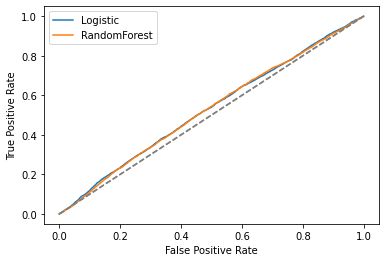

In [66]:
lr = plot_roc_curve(model_lr, X_test, y_test, label='Logistic')
rf = plot_roc_curve(model_rf, X_test, y_test, ax=lr.ax_, label='RandomForest')
plt.plot([(0,0), (1,1)], color='grey', linestyle='--')
plt.legend();